# Star Wars Survey - Data Cleanup & Analysis

In this project, we'll be looking at the data acquired by the team at [FiveThirtyEight](fivethirtyeight.com) when they wanted to learn more about Star Wars fans. In particular, they wondered if the rest of the country realized that "Episode V: The Empire Strikes Back" is *clearly the best of the Star Wars Movies*. The team received over 800 responses, which you can download from their [GitHub Repository](https://github.com/fivethirtyeight/data/tree/master/star-wars-survey).

There were many questions asked - some as simple as "Have you seen this movie?" to other more obscure questions such as "Which character shot first?". The answers vary across the board, and in this project we'll be organizing and examining this data to see if the people really do think Episode 5 is the best.

Additionally, we'll try to dive a little deeper into the data to see if we can discover any interesting connections between the Star Wars Universe, and the people who enjoy it.

In [1]:
#import any necessary libraries
import pandas as pd
import matplotlib.pyplot as plt

#read in our data and examine
star_wars = pd.read_csv("my_datasets\star_wars.csv", encoding="ISO-8859-1")
star_wars.head(5)

,RespondentID,Have you seen any of the 6 films in the Star Wars franchise?,Do you consider yourself to be a fan of the Star Wars film franchise?,Which of the following Star Wars films have you seen? Please select all that apply.,Unnamed: 4,Unnamed: 5,Unnamed: 6,Unnamed: 7,Unnamed: 8,Please rank the Star Wars films in order of preference with 1 being your favorite film in the franchise and 6 being your least favorite film.,...,Unnamed: 28,Which character shot first?,Are you familiar with the Expanded Universe?,Do you consider yourself to be a fan of the Expanded Universe?,Do you consider yourself to be a fan of the Star Trek franchise?,Gender,Age,Household Income,Education,Location (Census Region)
0,3292879998,Yes,Yes,Star Wars: Episode I The Phantom Menace,Star Wars: Episode II Attack of the Clones,Star Wars: Episode III Revenge of the Sith,Star Wars: Episode IV A New Hope,Star Wars: Episode V The Empire Strikes Back,Star Wars: Episode VI Return of the Jedi,3.0,...,Very favorably,I don't understand this question,Yes,No,No,Male,18-29,NaN,High school degree,South Atlantic
1,3292879538,No,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,Yes,Male,18-29,"$0 - $24,999",Bachelor degree,West South Central
2,3292765271,Yes,No,Star Wars: Episode I The Phantom Menace,Star Wars: Episode II Attack of the Clones,Star Wars: Episode III Revenge of the Sith,NaN,NaN,NaN,1.0,...,Unfamiliar (N/A),I don't understand this question,No,NaN,No,Male,18-29,"$0 - $24,999",High school degree,West North Central
3,3292763116,Yes,Yes,Star Wars: Episode I The Phantom Menace,Star Wars: Episode II Attack of the Clones,Star Wars: Episode III Revenge of the Sith,Star Wars: Episode IV A New Hope,Star Wars: Episode V The Empire Strikes Back,Star Wars: Episode VI Return of the Jedi,5.0,...,Very favorably,I don't understand this question,No,NaN,Yes,Male,18-29,"$100,000 - $149,999",Some college or Associate degree,West North Central
4,3292731220,Yes,Yes,Star Wars: Episode I The Phantom Menace,Star Wars: Episode II Attack of the Clones,Star Wars: Episode III Revenge of the Sith,Star Wars: Episode IV A New Hope,Star Wars: Episode V The Empire Strikes Back,Star Wars: Episode VI Return of the Jedi,5.0,...,Somewhat favorably,Greedo,Yes,No,No,Male,18-29,"$100,000 - $149,999",Some college or Associate degree,West North Central


## Cleaning the Data
To make some things easier down the road, we'll be converting any "Yes/No" answers to boolean values of True/False. This will make the data easier to work with.

In [2]:
#dictionary containing the values we want to turn into booleans
to_bool = {
    "Yes": True,
    "No": False
}

#column names
cols = ["Have you seen any of the 6 films in the Star Wars franchise?",
       "Do you consider yourself to be a fan of the Star Wars film franchise?"]

#convert to booleans
for c in cols:
    star_wars[c] = star_wars[c].map(to_bool)

#verify
star_wars.head()

,RespondentID,Have you seen any of the 6 films in the Star Wars franchise?,Do you consider yourself to be a fan of the Star Wars film franchise?,Which of the following Star Wars films have you seen? Please select all that apply.,Unnamed: 4,Unnamed: 5,Unnamed: 6,Unnamed: 7,Unnamed: 8,Please rank the Star Wars films in order of preference with 1 being your favorite film in the franchise and 6 being your least favorite film.,...,Unnamed: 28,Which character shot first?,Are you familiar with the Expanded Universe?,Do you consider yourself to be a fan of the Expanded Universe?,Do you consider yourself to be a fan of the Star Trek franchise?,Gender,Age,Household Income,Education,Location (Census Region)
0,3292879998,True,True,Star Wars: Episode I The Phantom Menace,Star Wars: Episode II Attack of the Clones,Star Wars: Episode III Revenge of the Sith,Star Wars: Episode IV A New Hope,Star Wars: Episode V The Empire Strikes Back,Star Wars: Episode VI Return of the Jedi,3.0,...,Very favorably,I don't understand this question,Yes,No,No,Male,18-29,NaN,High school degree,South Atlantic
1,3292879538,False,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,Yes,Male,18-29,"$0 - $24,999",Bachelor degree,West South Central
2,3292765271,True,False,Star Wars: Episode I The Phantom Menace,Star Wars: Episode II Attack of the Clones,Star Wars: Episode III Revenge of the Sith,NaN,NaN,NaN,1.0,...,Unfamiliar (N/A),I don't understand this question,No,NaN,No,Male,18-29,"$0 - $24,999",High school degree,West North Central
3,3292763116,True,True,Star Wars: Episode I The Phantom Menace,Star Wars: Episode II Attack of the Clones,Star Wars: Episode III Revenge of the Sith,Star Wars: Episode IV A New Hope,Star Wars: Episode V The Empire Strikes Back,Star Wars: Episode VI Return of the Jedi,5.0,...,Very favorably,I don't understand this question,No,NaN,Yes,Male,18-29,"$100,000 - $149,999",Some college or Associate degree,West North Central
4,3292731220,True,True,Star Wars: Episode I The Phantom Menace,Star Wars: Episode II Attack of the Clones,Star Wars: Episode III Revenge of the Sith,Star Wars: Episode IV A New Hope,Star Wars: Episode V The Empire Strikes Back,Star Wars: Episode VI Return of the Jedi,5.0,...,Somewhat favorably,Greedo,Yes,No,No,Male,18-29,"$100,000 - $149,999",Some college or Associate degree,West North Central


### Cleaning the "Which have you seen?" columns

Simply looking at this chart can be a bit overwhelming. A lot of the column names are extremely long, illogical, or unnamed. We can clean this up by renaming or turning the answers into booleans.

In [3]:
seen_bool = {
    "Star Wars: Episode I  The Phantom Menace": True,
    "Star Wars: Episode II  Attack of the Clones": True,
    "Star Wars: Episode III  Revenge of the Sith": True,
    "Star Wars: Episode IV  A New Hope": True,
    "Star Wars: Episode V The Empire Strikes Back": True,
    "Star Wars: Episode VI Return of the Jedi": True,
    np.NaN: False
}

seen_cols = star_wars.columns[3:9]

#converts answers to booleans
for c in seen_cols:
    star_wars[c] = star_wars[c].map(seen_bool)

Similarly, we can rename some of the column headers to make them easier to read and understand.

In [4]:
#dictionary containing new column names
new_col = {
    "Which of the following Star Wars films have you seen? Please select all that apply.": "seen_1",
    "Unnamed: 4": "seen_2",
    "Unnamed: 5": "seen_3",
    "Unnamed: 6": "seen_4",
    "Unnamed: 7": "seen_5",
    "Unnamed: 8": "seen_6"
}

#renaming columns
star_wars = star_wars.rename(columns = new_col)

#verify
star_wars.head()

,RespondentID,Have you seen any of the 6 films in the Star Wars franchise?,Do you consider yourself to be a fan of the Star Wars film franchise?,seen_1,seen_2,seen_3,seen_4,seen_5,seen_6,Please rank the Star Wars films in order of preference with 1 being your favorite film in the franchise and 6 being your least favorite film.,...,Unnamed: 28,Which character shot first?,Are you familiar with the Expanded Universe?,Do you consider yourself to be a fan of the Expanded Universe?,Do you consider yourself to be a fan of the Star Trek franchise?,Gender,Age,Household Income,Education,Location (Census Region)
0,3292879998,True,True,True,True,True,True,True,True,3.0,...,Very favorably,I don't understand this question,Yes,No,No,Male,18-29,NaN,High school degree,South Atlantic
1,3292879538,False,NaN,False,False,False,False,False,False,NaN,...,NaN,NaN,NaN,NaN,Yes,Male,18-29,"$0 - $24,999",Bachelor degree,West South Central
2,3292765271,True,False,True,True,True,False,False,False,1.0,...,Unfamiliar (N/A),I don't understand this question,No,NaN,No,Male,18-29,"$0 - $24,999",High school degree,West North Central
3,3292763116,True,True,True,True,True,True,True,True,5.0,...,Very favorably,I don't understand this question,No,NaN,Yes,Male,18-29,"$100,000 - $149,999",Some college or Associate degree,West North Central
4,3292731220,True,True,True,True,True,True,True,True,5.0,...,Somewhat favorably,Greedo,Yes,No,No,Male,18-29,"$100,000 - $149,999",Some college or Associate degree,West North Central


### Cleaning the "Rank Your Favorite" columns
We'll rename them, and convert them to floats so that we can perform further analysis on them.

In [5]:
#dictionary containing new columns names
ranks = {
    "Please rank the Star Wars films in order of preference with 1 being your favorite film in the franchise and 6 being your least favorite film.": "ranking_1",
    "Unnamed: 10": "ranking_2",
    "Unnamed: 11": "ranking_3",
    "Unnamed: 12": "ranking_4",
    "Unnamed: 13": "ranking_5",
    "Unnamed: 14": "ranking_6"
}

#renaming columns
star_wars = star_wars.rename(columns = ranks)

#convert to numeric values
rank_columns = star_wars.columns[9:15] #for re-usability
star_wars[rank_columns] = star_wars[rank_columns].astype(float)

#verify
star_wars.head()

,RespondentID,Have you seen any of the 6 films in the Star Wars franchise?,Do you consider yourself to be a fan of the Star Wars film franchise?,seen_1,seen_2,seen_3,seen_4,seen_5,seen_6,ranking_1,...,Unnamed: 28,Which character shot first?,Are you familiar with the Expanded Universe?,Do you consider yourself to be a fan of the Expanded Universe?,Do you consider yourself to be a fan of the Star Trek franchise?,Gender,Age,Household Income,Education,Location (Census Region)
0,3292879998,True,True,True,True,True,True,True,True,3.0,...,Very favorably,I don't understand this question,Yes,No,No,Male,18-29,NaN,High school degree,South Atlantic
1,3292879538,False,NaN,False,False,False,False,False,False,NaN,...,NaN,NaN,NaN,NaN,Yes,Male,18-29,"$0 - $24,999",Bachelor degree,West South Central
2,3292765271,True,False,True,True,True,False,False,False,1.0,...,Unfamiliar (N/A),I don't understand this question,No,NaN,No,Male,18-29,"$0 - $24,999",High school degree,West North Central
3,3292763116,True,True,True,True,True,True,True,True,5.0,...,Very favorably,I don't understand this question,No,NaN,Yes,Male,18-29,"$100,000 - $149,999",Some college or Associate degree,West North Central
4,3292731220,True,True,True,True,True,True,True,True,5.0,...,Somewhat favorably,Greedo,Yes,No,No,Male,18-29,"$100,000 - $149,999",Some college or Associate degree,West North Central


In [18]:
#star_wars[star_wars.columns[15:29]]
star_wars.columns

Index(['RespondentID',
       'Have you seen any of the 6 films in the Star Wars franchise?',
       'Do you consider yourself to be a fan of the Star Wars film franchise?',
       'seen_1', 'seen_2', 'seen_3', 'seen_4', 'seen_5', 'seen_6', 'ranking_1',
       'ranking_2', 'ranking_3', 'ranking_4', 'ranking_5', 'ranking_6',
       'Please state whether you view the following characters favorably, unfavorably, or are unfamiliar with him/her.',
       'Unnamed: 16', 'Unnamed: 17', 'Unnamed: 18', 'Unnamed: 19',
       'Unnamed: 20', 'Unnamed: 21', 'Unnamed: 22', 'Unnamed: 23',
       'Unnamed: 24', 'Unnamed: 25', 'Unnamed: 26', 'Unnamed: 27',
       'Unnamed: 28', 'Which character shot first?',
       'Are you familiar with the Expanded Universe?',
       'Do you consider yourself to be a fan of the Expanded Universe?',
       'Do you consider yourself to be a fan of the Star Trek franchise?',
       'Gender', 'Age', 'Household Income', 'Education',
       'Location (Census Region)'],
   

### Analysis - Highest-Ranked Movie
Let's try to find the highest ranked movie. In the survery, users were asked to give a numeric ranking to each of the movies they had seen - 1 being their favorite, 6 being their least favorite. We'll need to take the average value of each movie column to come up with their individual rankings. This means that *the lower the ranking, the better*. This is very important to remember!

In [6]:
#find highest-ranked movie
means = star_wars[rank_columns].mean()
means

ranking_1    3.732934
ranking_2    4.087321
ranking_3    4.341317
ranking_4    3.272727
ranking_5    2.513158
ranking_6    3.047847
dtype: float64

We now have numeric values for the average ranking of each movie. However, a list of numbers isn't the best when trying to convey information. Let's display this information in a bar chart for simplicity.

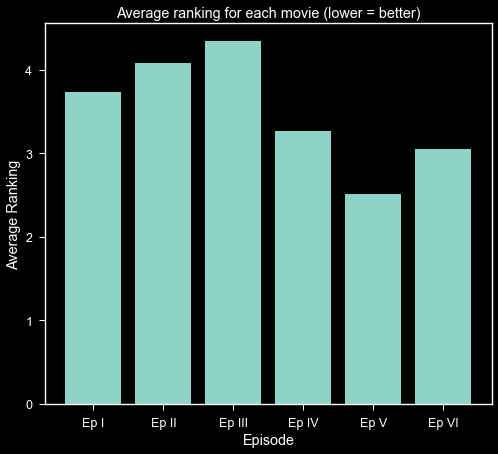

In [7]:
#plot bar chart
names = ['Ep I', 'Ep II', 'Ep III', 'Ep IV', 'Ep V', 'Ep VI'] #for re-usability

plt.bar(names, means)
plt.title("Average ranking for each movie (lower = better)")
plt.xlabel("Episode")
plt.ylabel("Average Ranking")
plt.show()

This confirms Team 538's initial statement, that Episode IV is indeed, the best of the bunch. Also important to note, is that the original trilogy is more popular than the second trilogy (remember, the lower the bar, the higher the ranking).

### Analysis - How Many People Watched Each Movie
Now we can analyze the total number of people that watched each movie. Remember that the movie releases were in the following order: IV, V, VI, I, II ,III.

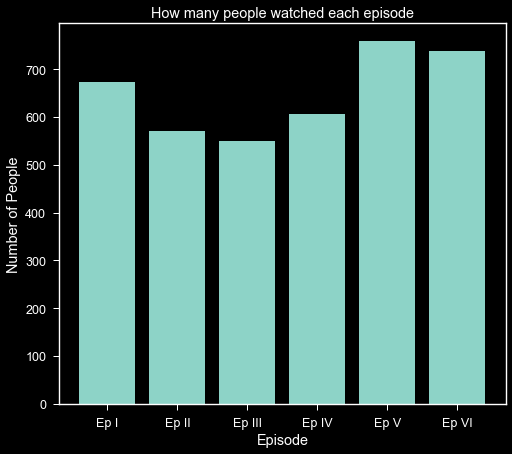

In [8]:
#get sum of each movie seen
seen_columns = star_wars.columns[3:9] #for re-usability
total_seen = star_wars[seen_columns].sum()

#plot bar chart
plt.bar(names, total_seen)
plt.title("How many people watched each episode")
plt.xlabel("Episode")
plt.ylabel("Number of People")
plt.show()

### Analysis - Males vs. Females - Rankings
Now we'll take a look at how males and females ranked the indiviual movies.

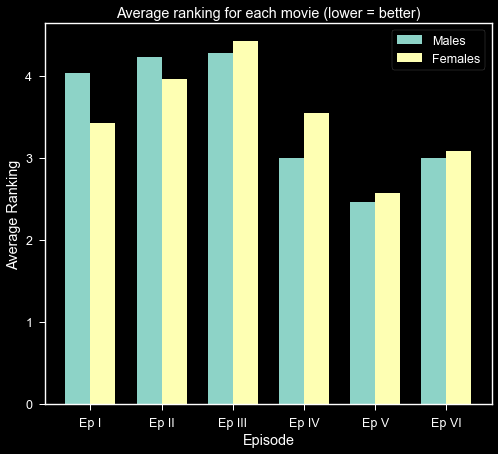

In [9]:
#copy data in male-only and female-only dataframes
males = star_wars[star_wars["Gender"] == "Male"]
females = star_wars[star_wars["Gender"] == "Female"]

#calculate rankings for both genders
male_means = males[rank_columns].mean()
female_means = females[rank_columns].mean()

names = ['Ep I', 'Ep II', 'Ep III', 'Ep IV', 'Ep V', 'Ep VI']
ind = np.arange(len(names)) #number of bars to show

#plot bar chart
width = 0.35
plt.bar(ind, male_means, width, label="Males")
plt.bar(ind+width, female_means, width, label="Females")
plt.xticks(ind+width / 2, names)
plt.title("Average ranking for each movie (lower = better)")
plt.xlabel("Episode")
plt.ylabel("Average Ranking")
plt.legend(loc="best")
plt.show()

### Analysis - Males vs. Females - Views

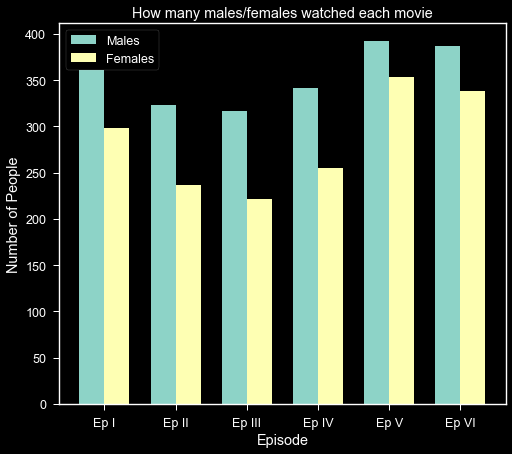

In [10]:
#calculate views for both genders
males_total_seen = males[seen_columns].sum()
females_total_seen = females[seen_columns].sum()

#plot bar chart
width = 0.35
plt.bar(ind, males_total_seen, width, label="Males")
plt.bar(ind+width, females_total_seen, width, label="Females")
plt.xticks(ind+width / 2, names)
plt.title("How many males/females watched each movie")
plt.xlabel("Episode")
plt.ylabel("Number of People")
plt.legend(loc="best")
plt.show()

### Analysis - How do Star Trek fans rate the movies?
Let's see if Star Trek fans rate the movies differently than Star Wars fans. There are a couple of ways we can go about this. We can look at responses from people who are:
* Star Trek fans and *not* Star Wars fans
* Star Trek fans *and* Star Wars fans

For my own curiosity, I want to see how people who are only Star Trek fans (and thus not Star Wars fans) rate the movies.

However, we'll have to quickly convert the Yes/No answers into booleans like we did at the beginning of our data cleaning process.

In [11]:
#column name
st_col = "Do you consider yourself to be a fan of the Star Trek franchise?" # is a Star Trek fan
sw_col = "Do you consider yourself to be a fan of the Star Wars film franchise?" # is a Star Wars fan

#convert to booleans
star_wars[st_col] = star_wars[st_col].map(to_bool)    

In [12]:
#copy data to trekkie dataframe
trekkie = star_wars[(star_wars[st_col] == True) & (star_wars[sw_col] == False)] #Star Trek fan and NOT Star Wars fan
starrie = star_wars[(star_wars[st_col] == False) & (star_wars[sw_col] == True)] #Star Wars fan and NOT Star Trek fan
#trekkie.head()

In [13]:
#starrie.head()

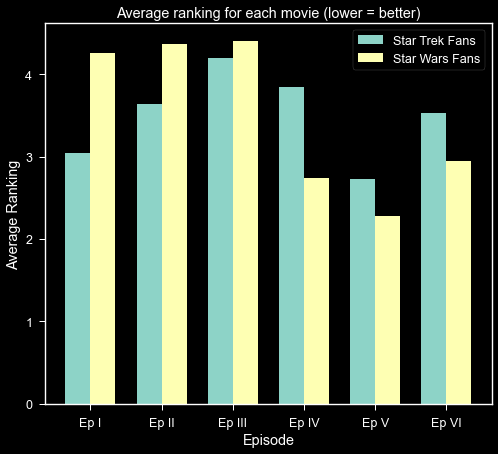

In [14]:
#calculate rankings for both genders
trekkie_means = trekkie[rank_columns].mean()
starrie_means = starrie[rank_columns].mean()

#plot bar chart
width = 0.35
plt.bar(ind, trekkie_means, width, label="Star Trek Fans")
plt.bar(ind+width, starrie_means, width, label="Star Wars Fans")
plt.xticks(ind+width / 2, names)
plt.title("Average ranking for each movie (lower = better)")
plt.xlabel("Episode")
plt.ylabel("Average Ranking")
plt.legend(loc="best")
plt.show()

A very interesting observation is that people who are *only* Star Wars fans and *not* Star Trek fans rated the original Trilogy higher and the second trilogy lower whereas people who are *only* Star Trek fans and *not* Star Wars fans did the opposite - they rated the original trilogy lower than the second trilogy.

### Analysis - Star Trek Fan Views

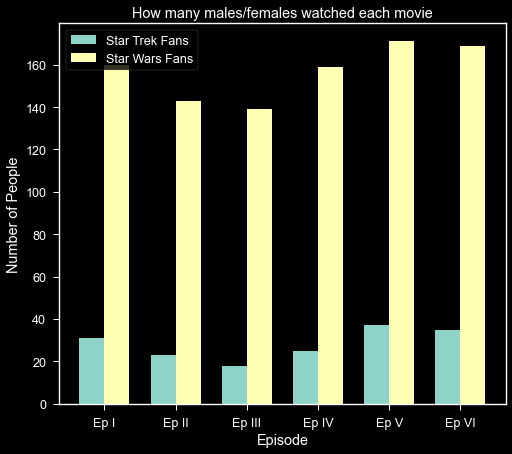

In [16]:
#calculate views for both genders
trekkie_total_seen = trekkie[seen_columns].sum()
starrie_total_seen = starrie[seen_columns].sum()

#plot bar chart
width = 0.35
plt.bar(ind, trekkie_total_seen, width, label="Star Trek Fans")
plt.bar(ind+width, starrie_total_seen, width, label="Star Wars Fans")
plt.xticks(ind+width / 2, names)
plt.title("How many males/females watched each movie")
plt.xlabel("Episode")
plt.ylabel("Number of People")
plt.legend(loc="best")
plt.show()

Here we can see a huge gap in the number of Star-Trek-only fans who have seen the movies. There are literally 4-5x the number of Star Wars fans who have seen the movies - not surprising since this was a survey about Star Wars.